---------

<center> 
    <font color="black" size = 7> 
        Tarea 1: 
    </font> 
</center>

<font color="red" size = 5> Problema 1: </font>

El objetivo de las bases es que realicemos un modelo de clasificación para poder contestar la siguiente pregunta:

      ¿Damos un crédito bancario o no?

Para empezar con la exploración de la base, tendrán que generar un análisis descriptivo de la información que les compartiré:

 - 1.- Los campos _id_ que son los identificadores de la información.
 - 2.- base_ini_interna (csv)
 - 3.- base_ini_parte1 (csv)
 - 4.- base_ini_externa (txt)
 - 5.- bases de comportamiento ( 2 txt, 3 csv )
 - 6.- base_inversión, es una variable simulada de una gamma (txt), es
 - 7.- Cuando una variable es categórica, está implícito en el nombre de la base. No tenemos un diccionario, simplemente que son categóricas.
 - 8.- El resto entonces son continuas. Es decir, los nombre estám enmascarados, ni siquiera yo sé qué significan.
 

¿Cómo hago los cruces? Exploren la información.

¿Qué análisis puedo realizar? Exploren ustedes, apóyense de los comportamientos de los ids.

Pero... ¿Las preguntas son abiertas? Así es, quiero que exploren. Hay bases que vienen en csv y otras en txt. Vean como tratarlas.

----

El resto de las tarea, son las preguntas que les dejé el dìa miércoles. Les coparto los programas que utilizamos.
Pero resumo un poco:

----

<font color="red" size=5> Problema 2: </font>

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.


<font color="red" size=5> Problema 3: </font>

Calcular el eror estándar de las betas del modelo lineal, les expliqué la idea de este problema

-------
<font color="blue" size=6> Problema 1: </font>

In [10]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib as mpl
from scipy.stats import spearmanr

sns.set_style('white')

from IPython.core.display import HTML
HTML(""" <style>
         .output_png { display: table-cell;
                       text-align: center;
                       vertical-align: middle;
                     }
         </style>
     """)

In [2]:
df1 = pd.read_csv('base_ini_interna.csv')
df2 = pd.read_csv('base_ini_parte1.csv')
df3 = pd.read_csv('base_ini_externa.txt', sep = " ")
df4 = pd.read_csv('base_comportamiento_2.txt', sep = " ")
df5 = pd.read_csv('base_comportamiento_3.csv')
df6 = pd.read_csv('base_inversion.txt', sep = " ")

In [3]:
display(df1.head(2))
display(df2.head(2))
display(df3.head(2))
display(df4.head(2))
display(df5.head(2))
display(df6.head(2))

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.0,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.0,b'1',28.0,45.0,1.0,4.0,173.0


,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334


,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0


,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,1.0


,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0


,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135


In [4]:
lst = [df1, df2, df3, df4, df5, df6]
for i, lt in enumerate(lst):
    print(f'Datos brutos tabla {i + 1:0>2}             : {lt.shape[0]: >10,}')
    if '_id_' in lt.columns:
        print(f'Datos unicos en _id_ tabla {i + 1:0>2}     : {lt._id_.unique().size : >10,}')
    elif 'num_caso' in lt.columns:
        print(f'Datos unicos en num_caso tabla {i + 1:0>2} : {lt.num_caso.unique().size : >10,}')
    else:
        print(f'Datos unicos en _id2_ tabla {i + 1:0>2}    : {lt._id2_.unique().size : >10,}')
    
    print('\n')

Datos brutos tabla 01             :     50,000
Datos unicos en _id_ tabla 01     :     50,000


Datos brutos tabla 02             :     50,000
Datos unicos en _id_ tabla 02     :     50,000


Datos brutos tabla 03             :     50,000
Datos unicos en _id_ tabla 03     :     50,000


Datos brutos tabla 04             :  1,455,536
Datos unicos en num_caso tabla 04 :     49,352


Datos brutos tabla 05             :  1,455,536
Datos unicos en num_caso tabla 05 :     49,352


Datos brutos tabla 06             :     17,536
Datos unicos en _id2_ tabla 06    :     17,536




In [5]:
tabla = df1.merge(df2, on = '_id_')
tabla = tabla.merge(df3, on = '_id_')

tabla = tabla.merge(df6, on = '_id2_', how = 'left')
tabla.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,1798899,0.33522,260.869565,25.854639,56.0,-230.0,NaN
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,1758511,0.33334,40.579710,2.872738,62.0,-230.0,0.041039
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,935318,0.29186,NaN,NaN,119.0,-230.0,NaN
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,191567,0.29112,349.275362,34.616490,94.0,-230.0,NaN
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,1572947,0.27318,276.811594,27.434645,125.0,-230.0,77.422135


In [6]:
print(tabla.shape)
print('-'*50)

tabla.info()

(50000, 16)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
 9   _id2_          50000 non-null  int64  
 10  comp_mixto1    50000 non-null  float64
 11  comp_externo1  47831 non-null  float64
 12  comp_externo2  44410 non-null  float64
 13  comp_externo3  49994 non-null  float64
 14  comp_externo4  50000 non-null  float64
 15  inversion      17536 non-null  float64
dtypes: float64(12), int64(2), objec

## Pregunta , 
consideramos los NA de inversión como 0  ? 
Y antes de juntar la tabla de inversion con la general eliminamos los na?
Quedariamos como con 44, 400 datos, ya habiendo rellenado los na de inversión con 0.

In [7]:
tabla_sinna = tabla.dropna()

In [8]:
tabla_sinna.describe()

,_id_,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,inversion
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,1.564100e+04,15641.000000,15641.000000,15641.000000,15641.000000,1.564100e+04,15641.000000
mean,47156.363084,1475.985832,15.352024,57.832555,1.934659,7.931079,160.352024,1.084596e+06,0.336931,575.456004,38.767986,89.038361,2.365555e+07,190.181176
std,28997.324941,6849.097153,8.644410,10.046816,0.968534,2.107436,8.644410,6.669385e+05,0.038869,5735.514283,41.768908,59.844225,4.858120e+08,1002.131335
min,1.000000,0.000000,1.000000,24.000000,1.000000,1.000000,146.000000,2.300000e+01,0.204760,0.002899,0.000287,-608.000000,-2.300000e+02,0.000012
25%,21839.000000,0.000000,9.000000,50.000000,1.000000,6.000000,154.000000,5.022970e+05,0.313560,150.724638,12.209135,73.000000,-2.300000e+02,6.399615
50%,45644.000000,0.000000,15.000000,57.000000,2.000000,9.000000,160.000000,1.049812e+06,0.344180,307.246377,24.705544,100.000000,-2.300000e+02,29.202730
75%,70986.000000,1266.464032,22.000000,66.000000,3.000000,9.000000,167.000000,1.632678e+06,0.369960,608.405797,51.709279,120.000000,-2.300000e+02,134.948996
max,98992.000000,329483.282675,32.000000,79.000000,6.000000,13.000000,177.000000,2.276816e+06,0.410980,417496.115942,861.821316,159.000000,1.000000e+10,95052.396733


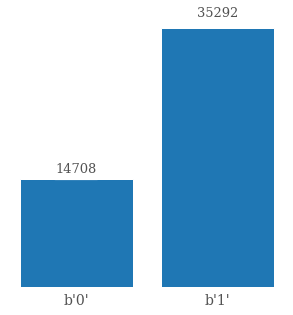

In [9]:
import collections as cl
wc = cl.Counter(tabla['comp_interno2'])
x = wc.keys()
y = wc.values()

fig, ax = plt.subplots(figsize=(5, 5))

bar = ax.bar(wc.keys(), wc.values())

for a,b in zip(x, y):
    plt.annotate(str(b), xy = (a, b), 
                 color = '#525252',
                 bbox=dict(boxstyle = "round", 
                           facecolor = "white", 
                           #edgecolor = "red", 
                           #lw = 1
                          ),
                 fontsize = 13, xytext = (a, b + b*.03),
                 ha = 'center', #'center', 'right', 'left'
                 va = 'bottom', # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                 fontfamily = 'serif'
                 #fontweight = 'bold'
                )

ax.axes.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize = 14, fontfamily = 'serif', color = '#525252')
#plt.tight_layout()
ax.tick_params(axis = 'x', color = 'w')

In [10]:
lst = tabla.columns
lst

Index(['_id_', 'fecha_inicio', 'comp_interno1', 'comp_interno2',
       'comp_interno3', 'comp_interno4', 'categoria1', 'categoria2',
       'categoria3', '_id2_', 'comp_mixto1', 'comp_externo1', 'comp_externo2',
       'comp_externo3', 'comp_externo4', 'inversion'],
      dtype='object')

En esta grafica son 32 numeros, bien podrían ser los estados del pais pero quien sabe 

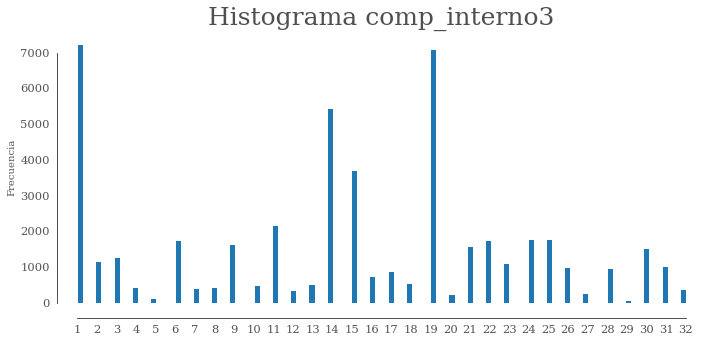

In [11]:
tabla[lst[4]].plot(kind = 'hist', bins = 100, figsize = (12,5))

plt.title('Histograma comp_interno3', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

x = np.arange(tabla[lst[4]].min() , tabla[lst[4]].max() + 1)

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')
plt.xticks(x)

sns.despine(offset = {'bottom' : 15, 'left' : -10}, 
            trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

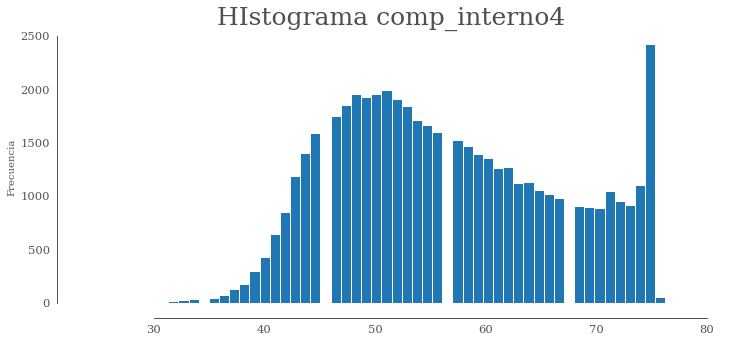

In [12]:
tabla[lst[5]].plot(kind = 'hist', 
                   bins = 60, # 50, 60, 70, 100 
                   figsize = (12,5))

plt.title('HIstograma ' + lst[5], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

Esta de abajo parece tener algún tipo de clasificación del 1 al 6

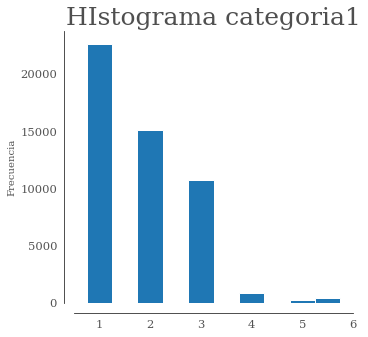

In [13]:
tabla[lst[6]].plot(kind = 'hist', 
#                   bins = 100, # 50, 60, 70, 100 
                   figsize = (5,5), align = 'left')

plt.title('HIstograma ' + lst[6], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

In [14]:
wc = cl.Counter(tabla[lst[6]])
wc

Counter({2.0: 15114, 1.0: 22655, 3.0: 10743, 4.0: 831, 6.0: 394, 5.0: 263})

In [15]:
tabla[lst[6]].unique()

array([2., 1., 3., 4., 6., 5.])

Esta de abajo también parece tener algún tipo de clasificación del 1 al 13

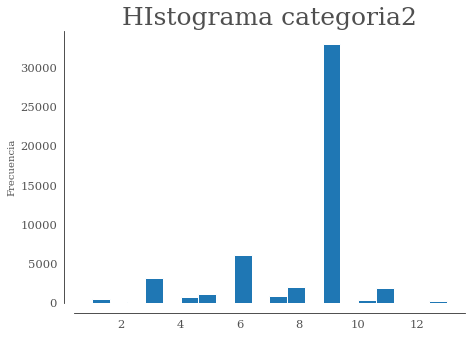

In [16]:
tabla[lst[7]].plot(kind = 'hist', 
                   bins = 20, # 50, 60, 70, 100 
                   figsize = (7,5))

plt.title('HIstograma ' + lst[7], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

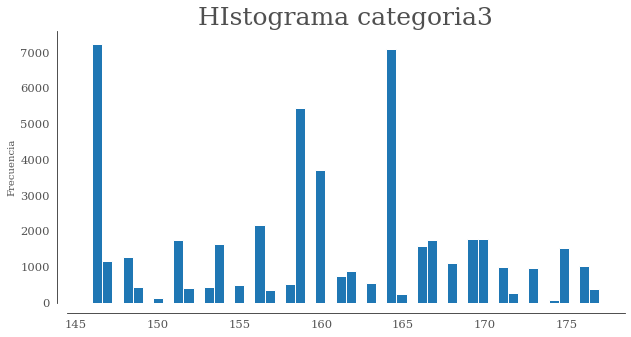

In [17]:
tabla[lst[8]].plot(kind = 'hist', 
                   bins = 50, # 50, 60, 70, 100 
                   figsize = (10,5),
                  )

plt.title('HIstograma ' + lst[8], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10, 
            #trim = True
           )

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

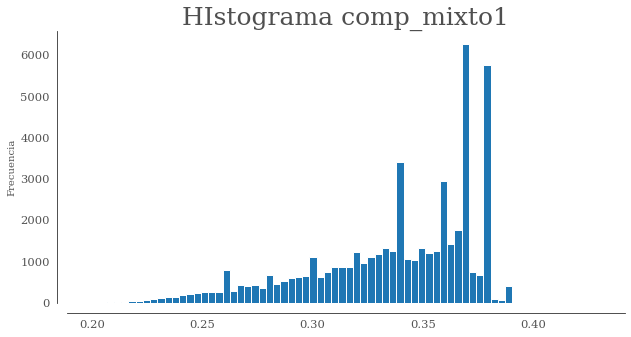

In [18]:
tabla[lst[10]].plot(kind = 'hist', 
                   bins = 70, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[10], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

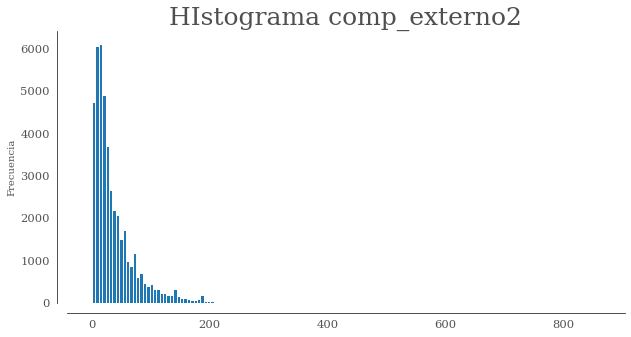

In [19]:
tabla[lst[12]].plot(kind = 'hist', 
                   bins = 150, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[12], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

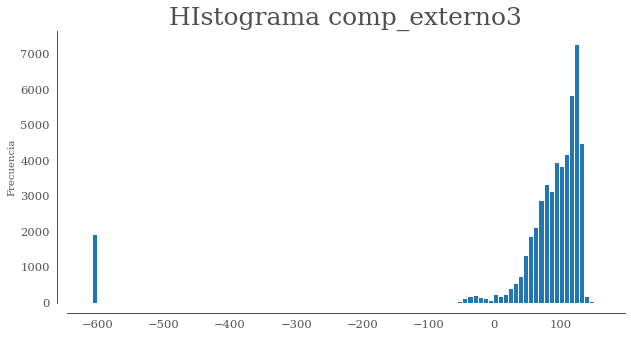

In [20]:
tabla[lst[13]].plot(kind = 'hist', 
                   bins = 100, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[13], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

Esta grafica de abajo parece ser clasificacion de algo, pues solo se acumula en 2 puntos. 
Se puede hacer un counplot o barplot, pero como vean.

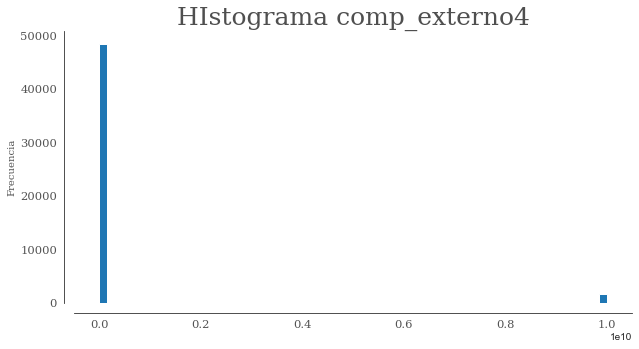

In [21]:
tabla[lst[14]].plot(kind = 'hist', 
                   bins = 70, # 50, 60, 70, 100 
                   figsize = (10,5))

plt.title('HIstograma ' + lst[14], color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.ylabel('Frecuencia', fontfamily = 'serif', color = '#525252')


sns.despine(offset = 10)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.show()

Al observar los datos de inversion, observamos que el percentil 75% está en el valor de 133.86, y un maximo de 95052.39, por lo qué restringiremos el dominio de la grafique pues se observa que tiene valores muy alejados del percentil 75%.

Esto también se puede observar a traves de un boxplot. 

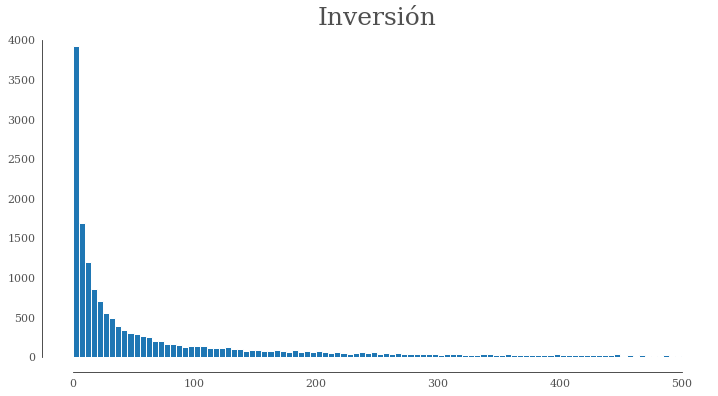

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(tabla[tabla['inversion'] < 500].inversion, bins = 100)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.title('Inversión', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.xticks(fontsize = 11, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11, fontfamily = 'serif', color = '#525252')
plt.show()

----------
<font color="blue" size=5> Problema 2: </font>

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.


- De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total
- Grafique los histogramas de las correlaciones
- Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [42]:
import pandas as pd
import numpy as np

x = np.linspace(0,1, 6)

bd_escuelas = pd.read_excel('data_schools.xlsx')

In [73]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random = bd_escuelas.sample(n = 15)[["escuela"]]
escuelas_random["f_seleccion"]=1

bd_escuelas=pd.merge(bd_escuelas, escuelas_random, how="left", on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)

bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,1
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


### Consideraremos solo la muestra para estimar la correlación

In [74]:
tabla = bd_escuelas[bd_escuelas["f_seleccion"] == 1][['LSAT', 'GPA']]
tabla

,LSAT,GPA
9,607,2.91
13,581,3.22
17,646,3.47
19,611,3.33
22,628,3.03
26,608,3.04
36,615,3.37
37,606,3.20
42,573,2.85
43,644,3.38


## Bootstrap con 1, 000 muestras

In [75]:
k = 1000    # 1,000 mueestras bootstrap

corr = np.zeros(k)

for j in range(k):
    corr[j] = tabla.sample(tabla.shape[0], replace = True).corr().values[0,1]

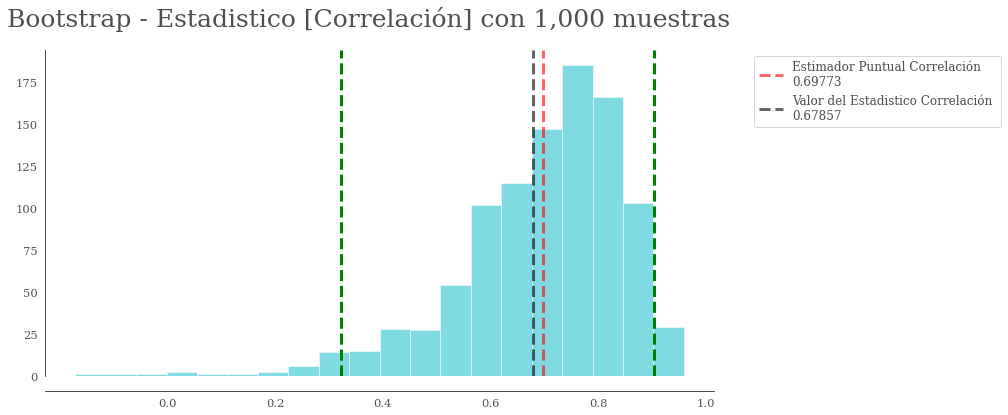

Promedio de la Muestra Bootstrap Correlación            =  0.69773
Valor del Estadistico Correlación                       =  0.67857
Desviación Estandar de la Muestra Bootstrap Correlación =  0.14814
Intervalo de Confianza                                  =  (0.32321, 0.90383)


In [125]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr, bins = 20, color = '#02B6C7', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 1,000 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est, _ = spearmanr(tabla.LSAT, tabla.GPA)

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))
for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación            = {est_puntual: .5f}")
print(f"Valor del Estadistico Correlación                       = {val_est: .5f}")
print(f'Desviación Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                                  =  ({np.percentile(corr,2.5):.5f},{np.percentile(corr,97.5): .5f})')

## Bootstrap con 20, 000 muestras

In [77]:
k = 3200    # 20,000 mueestras bootstrap

corr_2 = np.zeros(k)

for j in range(k):
    corr_2[j] = tabla.sample(tabla.shape[0], replace = True).corr().values[0,1]

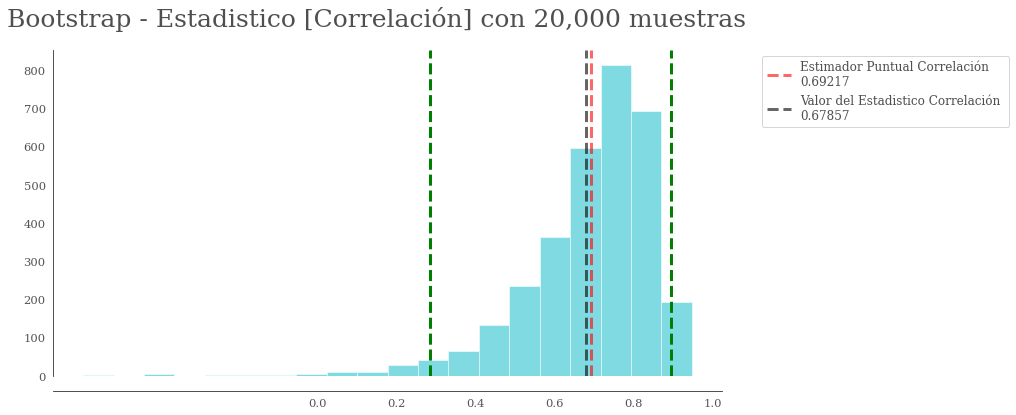

Promedio de la Muestra Bootstrap Correlación       =  0.69217
Valor del Estadistico Correlación                  =  0.67857
Error Estandar de la Muestra Bootstrap Correlación =  0.15037
Intervalo de Confianza                             =  (0.28393, 0.89443)


In [129]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_2, bins = 20, color = '#02B6C7', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 20,000 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_2)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est, _ = spearmanr(tabla.LSAT, tabla.GPA)

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_2,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_2,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor = (1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación       = {np.mean(corr_2): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_2,2.5):.5f},{np.percentile(corr_2,97.5): .5f})')

### Ahora sobre la población 

In [79]:
k = 20000    # 20,000 mueestras bootstrap

corr_3 = np.zeros(k)

for j in range(k):
    corr_3[j] = bd_escuelas.sample(bd_escuelas.shape[0], replace = True)[['LSAT', 'GPA']].corr().values[0,1]

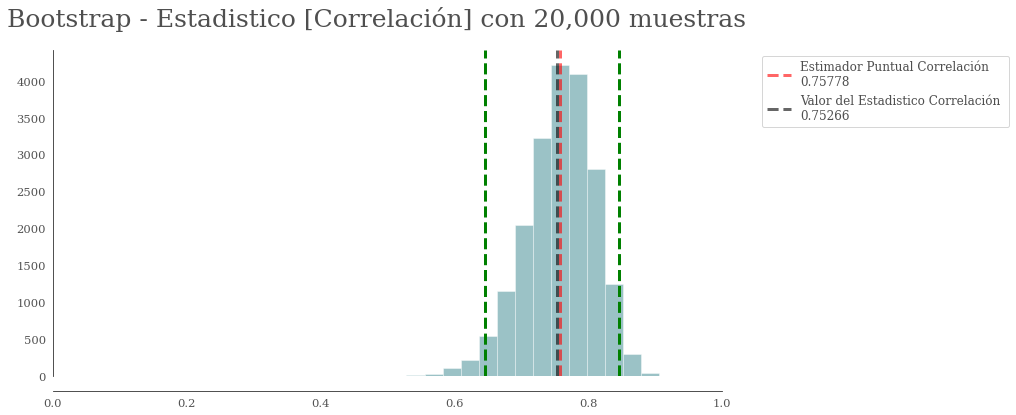

Promedio de la Muestra Bootstrap Correlación       =  0.75778
Valor del Estadistico Correlación                  =  0.75266
Error Estandar de la Muestra Bootstrap Correlación =  0.12291
Intervalo de Confianza                             =  (0.64627, 0.84554)


In [150]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_3, bins = 15, color = '#056871', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = False)

plt.suptitle('Bootstrap - Estadistico [Correlación] con 20,000 muestras', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_3)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth=3, alpha=0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_3,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_3,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(x, fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Bootstrap Correlación       = {np.mean(corr_3): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Bootstrap Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_3,2.5):.5f},{np.percentile(corr_3,97.5): .5f})')

# Jack - Knife sobre la población total 

In [148]:
k = bd_escuelas.shape[0]    # 20,000 mueestras bootstrap

corr_4 = np.zeros(k)
for j in range(1,k-1):
    corr_4[j] = bd_escuelas.loc[j:, ['LSAT', 'GPA']].corr().values[0,1]

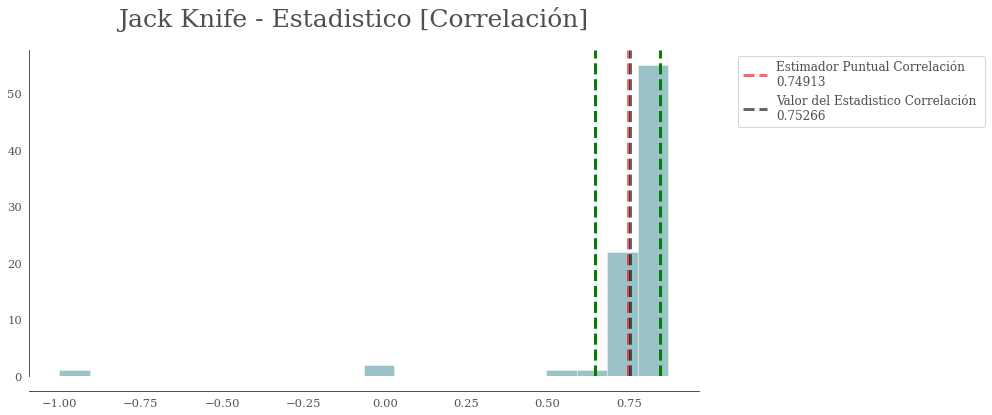

Promedio de la Muestra Jack Knife Correlación      =  0.74913
Valor del Estadistico Correlación                  =  0.75266
Error Estandar de la Muestra Jack Nife Correlación =  0.12667
Intervalo de Confianza                             =  (0.01476, 0.83524)


In [149]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(corr_4, bins = 20, color = '#056871', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0})

plt.suptitle('Jack Knife - Estadistico [Correlación]', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

est_puntual = np.mean(corr_4)
plt.axvline(est_puntual, linestyle="--",color = "red", linewidth = 3, alpha = 0.6, 
            label = f"Estimador Puntual Correlación \n{est_puntual:.5f}")

val_est, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)

plt.axvline(val_est, linestyle="--",color = "black", linewidth = 3, alpha=0.6, 
            label = f"Valor del Estadistico Correlación \n{val_est:.5f}")

plt.axvline(np.percentile(corr_3,2.5),color = "green", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(corr_3,97.5),color = "green", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')

plt.show()

print(f"Promedio de la Muestra Jack Knife Correlación      = {np.mean(corr_4): .5f}")
print(f"Valor del Estadistico Correlación                  = {val_est: .5f}")
print(f'Error Estandar de la Muestra Jack Nife Correlación = {(1 - est_puntual**2)/np.sqrt(tabla.shape[0] - 3): .5f}')
print(f'Intervalo de Confianza                             =  ({np.percentile(corr_4,2.5):.5f},{np.percentile(corr_4,97.5): .5f})')

------
<font color="blue" size=5> Problema 3: </font>

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = bd_escuelas[['LSAT']]
y = bd_escuelas[['GPA']]

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [34]:
y_estim = reg.predict(X).reshape(-1)
x = X.to_numpy().reshape(-1)

In [35]:
y_real = y.to_numpy().reshape(-1)
n = len(y_real)
residual = y_real - y_estim

# Error Estandar
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n - 2)
err_reg=np.sqrt(num/den)
err_reg

0.0003577625024658635

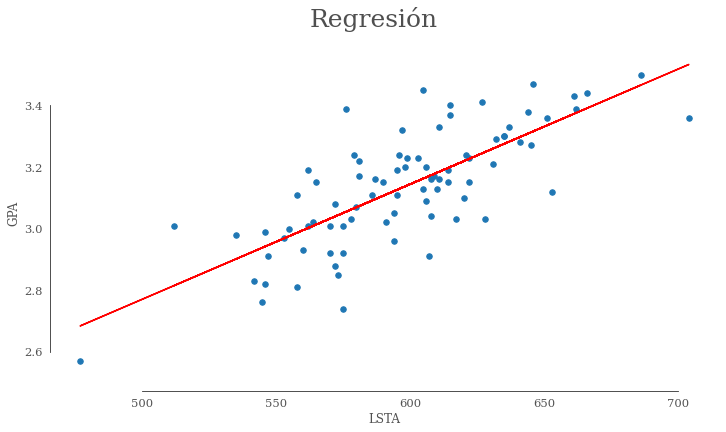

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(X, y,s = 30)
plt.plot(x, y_estim, color='red')

plt.suptitle('Regresión', color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

sns.despine(offset = {'bottom' : 15, 'left' : 0}, 
            trim = True)

plt.xlabel("LSTA", fontsize = 12, fontfamily = 'serif', color = '#525252')
plt.ylabel("GPA", fontsize = 12, fontfamily = 'serif', color = '#525252')
plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

plt.show()

In [46]:
df = pd.DataFrame(residual, columns=['residual'])
df["x"] = x

In [47]:
simul = 10000
res_boost= np.array([ ])
for i in range(0,simul):
    r_i = np.random.choice(residual, len(residual), replace=True)
    df_aux = pd.DataFrame(r_i, columns = ['residual'])
    df_aux = pd.merge(df_aux, df, how="inner", on = ["residual"])
    
    x_i = df_aux[["x"]].to_numpy().reshape(-1)
    den = sum((x_i-np.mean(x_i))**2)
    num = sum(r_i**2)/(n)
    err = np.sqrt(num/den)
    res_boost = np.append(res_boost,err)

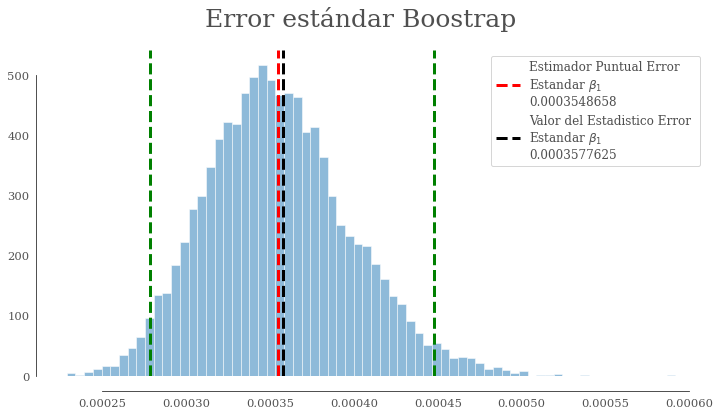

Error Estándar sin Bootsrap                         = 0.0003577625024658635
Promedio de Error Estándar de la muestras Bootstrap = 0.00035486578889727894
Intervalo de Confianza                              = (0.00028, 0.00045)


In [117]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.suptitle("Error estándar Boostrap", color = '#4f4f4f', fontsize = 25, 
             fontfamily = 'serif')

plt.hist(res_boost, bins = 70, alpha = 0.5, edgecolor = "white")

#plt.axvline(x = err_reg, color = 'black', linestyle='--', linewidth = 3, 
#            label = f"Estimador Puntual Error Estandar r'\beta ' \n{np.mean(res_boost):.5f}")
plt.axvline(x = np.mean(res_boost), color = 'red', linestyle='--', linewidth = 3, 
            label = "Estimador Puntual Error \nEstandar " + r'$\beta_{1}$' + f'\n{np.mean(res_boost):.10f}')

plt.axvline(x = err_reg, color='black', linestyle='--', linewidth = 3,
            label = f"Valor del Estadistico Error \nEstandar " + r'$\beta_{1}$' + f'\n{err_reg:.10f}')

plt.axvline(np.percentile(res_boost,2.5), color = "green", linestyle="--",linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(res_boost,97.5), color = "green", linestyle="--",linewidth = 3) 

sns.despine(offset = {'bottom' : 15, 'left' : 0},  trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'serif', color = '#525252')

leg = plt.legend(fontsize = 12) 

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('serif')
    
plt.show()
print("Error Estándar sin Bootsrap                         =", err_reg)
print("Promedio de Error Estándar de la muestras Bootstrap =", np.mean(res_boost))
print(f'Intervalo de Confianza                              = ({np.percentile(res_boost,2.5):.5f},{np.percentile(res_boost,97.5): .5f})')